In [1]:
# 로지스틱 회귀 뉴런으로 단일층 신경망 만들기



In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer



class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b # 직선 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레이디언트 계산
        b_grad = 1 * err # 절편에 대한 그레이디언트 계산
        return w_grad, b_grad
     
    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp()계산 위해서
        a = 1/(1+np.exp(-z)) # 시그모이드 계산
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) # 가중치 1로 초기화
        self.b = 0 # 절편 초기화
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
            for i in indexes:      # 모든 샘플 반복
                z = self.forpass(x[i]) # 정방향 계산 
                a = self. activation(z) # 활성호 ㅏ함수 적용
                err = -(y[i] - a) # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑 후 손실 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 에포크마다 손실을 저장

            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
        

In [46]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y ,stratify=y, test_size=0.2, random_state=42)




layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

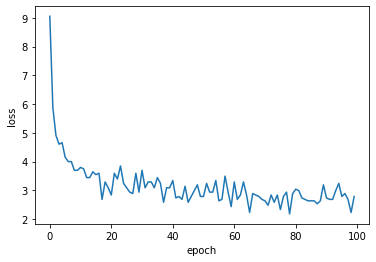

In [48]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [53]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss ='log', max_iter=100, tol=1e-3, random_state=42) 
# max_iter로 반복 횟수 100
# random_state = 반복 실행시 결과를 동일하게 재연하기 위함 난수 초깃값 42
# 반복할 때마다 로지스틱 손실 함수의 값이 tol에 지정한 값만큼 감소되지 않으면 반복 중단 설정
# 최적값 수렴할 정도로 충분한 반복 횟수인지 사용자에게 알려준다.




In [55]:
# 사이킷런으로 훈련하고 평가
sgd.fit(x_train, y_train)
print("sgd.score: ",sgd.score(x_test, y_test))


sgd.score:  0.8333333333333334


In [56]:
# 사이킷런으로 예측하기
# 예측을 위한 predict 메서드가 이미 구현되어 있다.
# 사이킷런은 입력 데이터로 2차원 배열만 받는다.
# 샘플 하나를 주입하더라도 2차원이여야 한다.

print("sgd.predict : ",sgd.predict(x_test[0:10]))
print("sgd.predict_all : ",sgd.predict(x_test[:]))

sgd.predict :  [0 1 0 0 0 0 1 0 0 0]
sgd.predict_all :  [0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 1]
